# Exercise 04

Sandra Marcela Meneses Código:201727731       
Diego Fernando López Castillo Código:200919053

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [3]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [4]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [5]:
X = data.drop(['Label'], axis=1)
y = data['Label']

In [6]:
data.columns

Index(['accountAge', 'digitalItemCount', 'sumPurchaseCount1Day',
       'sumPurchaseAmount1Day', 'sumPurchaseAmount30Day',
       'paymentBillingPostalCode - LogOddsForClass_0',
       'accountPostalCode - LogOddsForClass_0',
       'paymentBillingState - LogOddsForClass_0',
       'accountState - LogOddsForClass_0', 'paymentInstrumentAgeInAccount',
       'ipState - LogOddsForClass_0', 'transactionAmount',
       'transactionAmountUSD', 'ipPostalCode - LogOddsForClass_0',
       'localHour - LogOddsForClass_0', 'Label'],
      dtype='object')

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [9]:
from sklearn.linear_model import LogisticRegression

data_cols = ['accountAge', 'digitalItemCount', 'sumPurchaseCount1Day',
       'sumPurchaseAmount1Day', 'sumPurchaseAmount30Day',
       'paymentBillingPostalCode - LogOddsForClass_0',
       'accountPostalCode - LogOddsForClass_0',
       'paymentBillingState - LogOddsForClass_0',
       'accountState - LogOddsForClass_0', 'paymentInstrumentAgeInAccount',
       'ipState - LogOddsForClass_0', 'transactionAmount',
       'transactionAmountUSD', 'ipPostalCode - LogOddsForClass_0',
       'localHour - LogOddsForClass_0']
X = data[data_cols]
y = data['Label']

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

from sklearn.metrics import  precision_score, recall_score,f1_score,fbeta_score

# calculate testing accuracy
#Se calculan las métricas Accuracy, F1Score, Beta_score
from sklearn import metrics
print('Accuracy    ',metrics.accuracy_score(y_test, y_pred_class))

print('f1_score    ', f1_score(y_test, y_pred_class))

print('Beta_score B=10    ', fbeta_score(y_test, y_pred_class,10))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)



Accuracy     0.993973645512
f1_score     0.0
Beta_score B=10     0.0


C:\Users\marce\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[34472,     0],
       [  209,     0]], dtype=int64)

Al realizar el modelo de regresion Logistica con los datos puros, encontramos que debido al desbalanceo de clases no se predicen valores en 1, por lo cual apesar de tener un accuracy de 0.993 no se predice lo que se interesa y por lo tano no es un buen modelo. Esto se evidencia al revisar metricas como el F1-Score, y la Matriz de Confusión.

# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [10]:
n_samples = y.shape[0]
print(n_samples)

138721


In [11]:
n_samples_0 = (y == 0).sum()
n_samples_0

137924

In [12]:
n_samples_1 = (y == 1).sum()
n_samples_1

797

In [13]:
n_samples_1 / n_samples

0.0057453449730033666

Se evidencia el desbalanceo de clases

Ahora procedemos a crear una funcion para realizar el Undre-Sampling variando el Target-percentage

In [14]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
plt.style.use('ggplot')

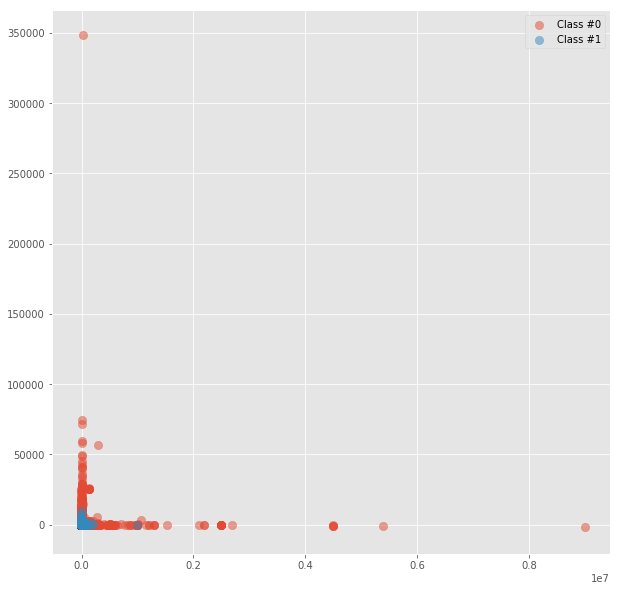

In [15]:

# Generate some data

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X)

# Plot the original data

def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

plot_two_classes(x_vis, y)

In [16]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

Target percentage 0.1
y.shape =  8000 y.mean() =  0.099625


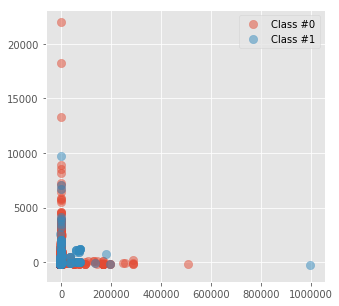

Target percentage 0.2
y.shape =  3992 y.mean() =  0.19964929859719438


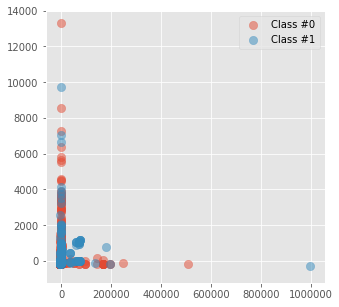

Target percentage 0.3
y.shape =  2615 y.mean() =  0.30478011472275335


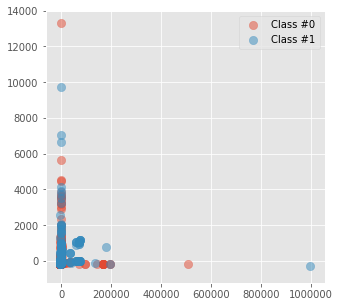

Target percentage 0.4
y.shape =  1956 y.mean() =  0.4074642126789366


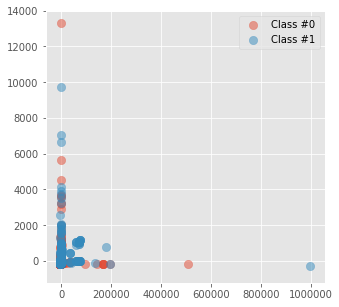

Target percentage 0.5
y.shape =  1585 y.mean() =  0.5028391167192429


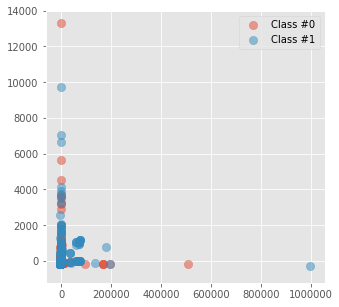

In [18]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(x_vis, y, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()    


In [19]:
 X_u, y_u = UnderSampling(X, y, 0.5, 1)

In [20]:
logreg.fit(X_u, y_u)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

from sklearn.metrics import  precision_score, recall_score,f1_score,fbeta_score

# calculate testing accuracy
from sklearn import metrics
print('Accuracy    ',metrics.accuracy_score(y_test, y_pred_class))

print('f1_score    ', f1_score(y_test, y_pred_class))

print('Beta_score B=10    ', fbeta_score(y_test, y_pred_class,10))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)


Accuracy     0.5570773622444566
f1_score     0.01990684616857015
Beta_score B=10     0.43328566714332867


array([[19164, 15308],
       [   53,   156]], dtype=int64)

Al realizar Under-Sampling el modelo mejora en el F1-Score y el Beta_score mejora de 0 a 0.43 respecto al modelo de regresion logistica sin realizar balanceo

# Exercice 04.3

Now using random-over-sampling

In [21]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

In [63]:
from imblearn.over_sampling import RandomOverSampler

In [64]:
ros = RandomOverSampler(random_state=0)
X_o, y_o = ros.fit_sample(X, y)

In [65]:
logreg.fit(X_o, y_o)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

from sklearn.metrics import  precision_score, recall_score,f1_score,fbeta_score

# calculate testing accuracy
from sklearn import metrics
print('Accuracy    ',metrics.accuracy_score(y_test, y_pred_class))

print('f1_score    ', f1_score(y_test, y_pred_class))

print('Beta_score B=10    ', fbeta_score(y_test, y_pred_class,10))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

Accuracy     0.5362878809722903
f1_score     0.019509815876112672
Beta_score B=10     0.4356617151484108


array([[18439, 16033],
       [   49,   160]], dtype=int64)

Al realizar el Oversampling encontramos que el Beta_score mejora de "0" a "0.4356" y lo mismo sucede con el F1_Socore

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

In [26]:
import pandas as pd
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, x_vis.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

Target percentage 0.25 k  5
y.shape =  183898 y.mean() =  0.24999728110148017


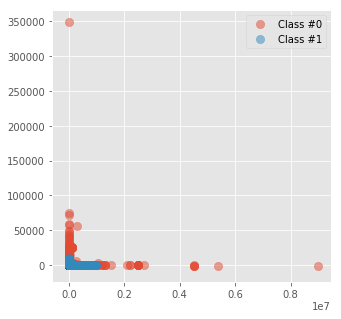

Target percentage 0.25 k  15
y.shape =  183898 y.mean() =  0.24999728110148017


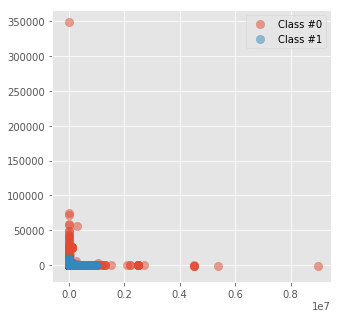

Target percentage 0.5 k  5
y.shape =  275848 y.mean() =  0.5


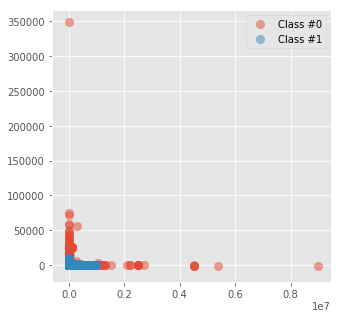

Target percentage 0.5 k  15
y.shape =  275848 y.mean() =  0.5


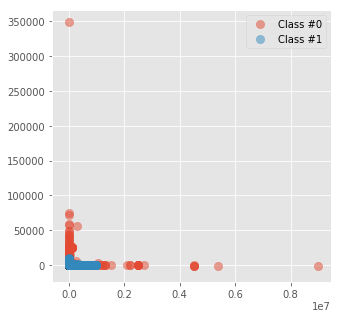

In [27]:
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_u, y_u = SMOTE(x_vis, y, target_percentage, k, seed=3)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
        plot_two_classes(X_u, y_u, size=(5, 5))
        plt.show()    

In [ ]:
X_s, y_s = SMOTE(X, y, 0.5, k, seed=3)

In [ ]:
logreg.fit(X_s, y_s)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

from sklearn.metrics import  precision_score, recall_score,f1_score,fbeta_score

# calculate testing accuracy
from sklearn import metrics
print('Accuracy    ',metrics.accuracy_score(y_test, y_pred_class))

print('f1_score    ', f1_score(y_test, y_pred_class))

print('Beta_score B=10    ', fbeta_score(y_test, y_pred_class,10))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [30]:
models = {'lr': LogisticRegression(),
          'dt': DecisionTreeClassifier(),
          'nb': GaussianNB(),
          'Kn': KNeighborsClassifier()}

In [31]:
for model in models.keys():
    models[model].fit(X_train, y_train)

In [32]:
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [33]:
# Evaluate each model
from sklearn.metrics import mean_squared_error


for model in models.keys():
    print('RMSE              ',model,np.sqrt(mean_squared_error(y_pred[model], y_test)))
    print('Accuracy          ',model,metrics.accuracy_score(y_test, y_pred[model]))
    print('F1 Score          ',model,f1_score(y_test, y_pred[model]))
    print('Beta Score B=10   ',model,fbeta_score(y_test, y_pred[model],10))

RMSE               lr 0.07762959801550057
Accuracy           lr 0.9939736455119518
F1 Score           lr 0.0
Beta Score B=10    lr 0.0
RMSE               dt 0.10522521127604628
Accuracy           dt 0.9889276549119114
F1 Score           dt 0.13513513513513511
Beta Score B=10    dt 0.1433640880056778
RMSE               nb 0.09285168478853235
Accuracy           nb 0.9913785646319311
F1 Score           nb 0.0
Beta Score B=10    nb 0.0
RMSE               Kn 0.07910138016526676
Accuracy           Kn 0.9937429716559499
F1 Score           Kn 0.1422924901185771
Beta Score B=10    Kn 0.08680290297937356


C:\Users\diego\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test))

0.07791924008580019

# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

In [39]:
 X_us, y_us = UnderSampling(X, y, 0.5, 1)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_us, y_us)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
# list of values to try for n_estimators
RMSE_scores = []
rfreg = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [48]:
RMSE_scores

[0.07620928564538625]

In [50]:
rfreg.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [51]:
y_pred_classRF = rfreg.predict(X_test)

from sklearn.metrics import  precision_score, recall_score,f1_score,fbeta_score

# calculate testing accuracy
from sklearn import metrics
print('Accuracy    ',metrics.accuracy_score(y_test, y_pred_classRF))

print('f1_score    ', f1_score(y_test, y_pred_classRF))

print('Beta_score B=10    ', fbeta_score(y_test, y_pred_classRF,10))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_classRF)

Accuracy     0.9997981603759983
f1_score     0.9829683698296838
Beta_score B=10     0.9668277888351815


array([[34472,     0],
       [    7,   202]], dtype=int64)

Al realizar el modelo de RandomForestClasifier con n_estimators=100, el F1_Score y Beta_score mejora significativamente al modelo de regresión logistico con el UnderSampling